<a href="https://colab.research.google.com/github/lathamithu/The_Sparks_Foundation/blob/main/GRIP_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION USING SUPERVISED ML**

In [56]:
# importing the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [57]:
# loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [59]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [60]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [61]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*DATA VISUALIZATION*

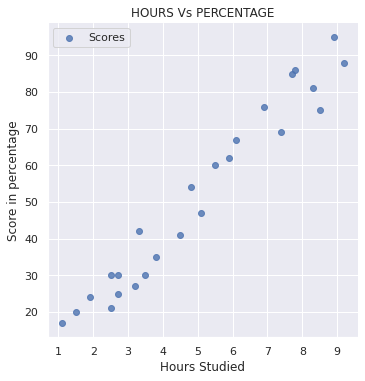

In [62]:
sns.lmplot(x = 'Hours', y = 'Scores', data = data, fit_reg = False, legend = False) 
plt.title('HOURS Vs PERCENTAGE')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in percentage')  
plt.legend(['Scores'], loc='upper left')
plt.show()

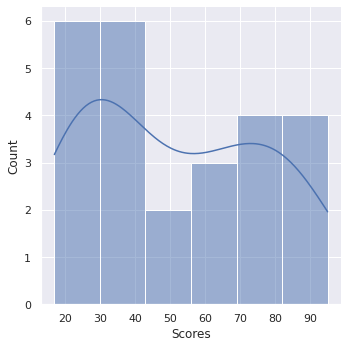

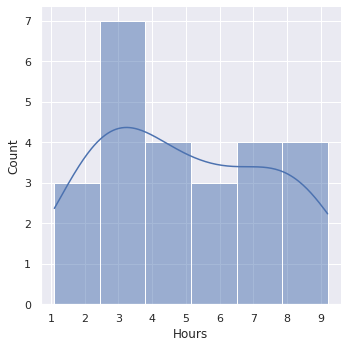

In [63]:
sns.displot(data = data, x="Scores", kde=True)
plt.show()
print()
sns.displot(data = data, x="Hours", kde=True)
plt.show()

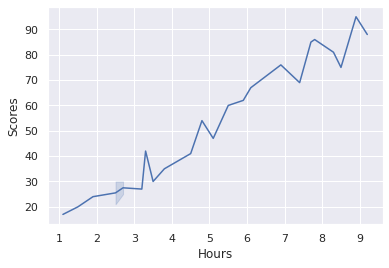

In [64]:
sns.lineplot(x = 'Hours', y = 'Scores', data = data)

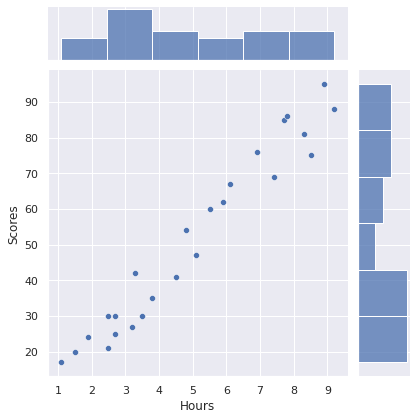

In [65]:
sns.jointplot(x = "Hours", y = "Scores", kind = "scatter", data = data)

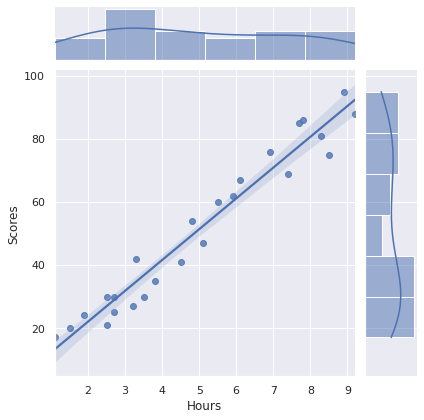

In [66]:
sns.jointplot(x = "Hours", y = "Scores", kind = "reg", data = data)

*TRAINING THE DATA*

In [67]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

*FITTING THE DATA*

In [69]:
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(reg.coef_)
print(reg.intercept_)

[9.91065648]
2.018160041434662


In [71]:
print("Trained model y = " + str(round(reg.intercept_,4)) + ' + ' +  str(round(reg.coef_[0],4)) + 'x')

Trained model y = 2.0182 + 9.9107x


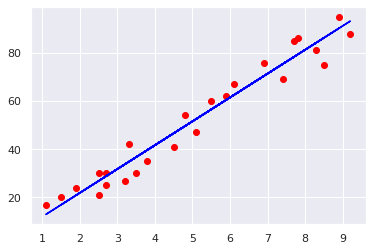

In [72]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.coef_ * X + reg.intercept_, color = 'blue');
plt.show()

*PREDICTING THE DATA*

In [73]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


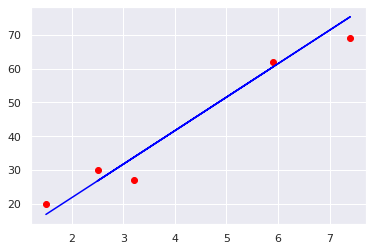

In [74]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred,color = 'blue')

*MODEL EVALUATIONS*

In [75]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Root mean square error : " + str(rmse))
print("R-squared value : " + str(r2))
print("Mean Absolute Error : " + str(mae))

Root mean square error : 4.647447612100373
R-squared value : 0.9454906892105354
Mean Absolute Error : 4.183859899002982


In [76]:
l = []
lst = []
lst.append(float(input("Enter the number of hours : ")))
l.append(lst)
print("Predicted score if a student studies for " + str(l[0][0]) + " hrs/day = " + str(round(reg.predict(l)[0],4)))

Enter the number of hours : 6.9
Predicted score if a student studies for 6.9 hrs/day = 70.4017


In [77]:
hours = [[9.25]]
print("Predicted score if a student studies for " + str(hours[0][0]) + " hrs/day = " + str(round(reg.predict(hours)[0],4)))

Predicted score if a student studies for 9.25 hrs/day = 93.6917
